In [1]:
# set up the libraries and the imports
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset and extracting the independent and dependent variable
mydata= pd.read_csv('AB_NYC_2019.csv')
x=mydata.iloc[:, :-1].values
y=mydata.iloc[:, 2].values

mydata.head()

,neighbourhood,price per night,price per year
0,Kensington,149,54385
1,Midtown,225,82125
2,Harlem,150,54750
3,Clinton Hill,89,32485
4,East Harlem,80,29200


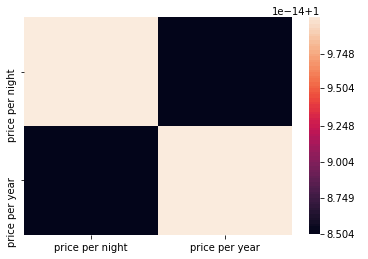

In [3]:
# data visualization and generating the matrix

sns.heatmap(mydata.corr())

In [4]:
#encoding the data by categories and turning all the characters into numbers so the model can use it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
print(ct.fit_transform(x)) # Notice the output is a string


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0.0 0.0 0.0 ... 0.0 0.0 149]
 [0.0 0.0 0.0 ... 0.0 0.0 225]
 [0.0 0.0 0.0 ... 0.0 0.0 150]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 115]
 [0.0 0.0 0.0 ... 0.0 0.0 55]
 [0.0 0.0 0.0 ... 0.0 0.0 90]]


In [5]:
# setting up the training values to be used
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [6]:
# import inear regression and put in the model to be trained
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# using the regression to make predictions on the data
y_pred=regressor.predict(x_test)
print(y_pred)

[ 82125. 236885. 109500. ...  54750.  54385.  61685.]


In [8]:
print(regressor.coef_)


[1.29374446e-13 3.65000000e+02]


In [9]:
print(regressor.intercept_)

7.275957614183426e-11


In [10]:
#gets the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0